<a href="https://colab.research.google.com/github/JotaBlanco/CryptoAlgoTrading/blob/main/Copia_de_Angel%20(Sharpe%20%26%20Sortino)_Example_Price_Request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables creation 
Example on creating feature and target variables.



In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
#sns.set()
plt.rcParams["figure.figsize"] = (20,5)

# 01 - Import historic data

- Here we will import diverse historic data to add to to the data we are storing in Quix

# 02 - Import data from Quix

In [124]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik1qVTBRVE01TmtJNVJqSTNOVEpFUlVSRFF6WXdRVFF4TjBSRk56SkNNekpFUWpBNFFqazBSUSJ9.eyJodHRwczovL3F1aXguYWkvb3JnX2lkIjoicnViZW5ndWlyYWRvIiwiaHR0cHM6Ly9xdWl4LmFpL293bmVyX2lkIjoiYXV0aDB8NzhkNzdkYzQtNDkwNi00YTQzLThkNGEtMjA3MDAwYTIzZTA5IiwiaHR0cHM6Ly9xdWl4LmFpL3Rva2VuX2lkIjoiYWYyYTc0ZDYtYTlkNS00NWQ1LThmMDMtNWMwZjRlM2UwODIwIiwiaHR0cHM6Ly9xdWl4LmFpL2V4cCI6IjE2NTEyNjk2MDAiLCJpc3MiOiJodHRwczovL2F1dGgucXVpeC5haS8iLCJzdWIiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYS0BjbGllbnRzIiwiYXVkIjoicXVpeCIsImlhdCI6MTY0NzAwMzIzMiwiZXhwIjoxNjQ5NTk1MjMyLCJhenAiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYSyIsImd0eSI6ImNsaWVudC1jcmVkZW50aWFscyIsInBlcm1pc3Npb25zIjpbXX0.b2itd0atp6C8IX9Jn68hciQgH80u5jIXW2zz55M67s2g3My9QeKpqaDbeVMcDeQo6WFCr36wMUikcgUkDCOpO7WGUqI_W9tyTUaaOZW_TBVBjgO9SyjYv59xT-QIH2Ejg7bMWB3XMS5SsXUXs7jyFVjn9-S4Sfapm7ogZGZpPNT54dBAH31JURYmj1Ygqw7ySQrGh-gkUj5j_I0Gtt0jqznUpPDeKJOa2Z3S5uwLX9zhIPaOs0cuvc40AHJBVXMfcVkVEd_Sd_Qlqj8btoZA9yoCKUFNC8mQiGQcQuJUGY1GuvQu_CdoiF-TGqSiPSePljfVfHS49bKULWsTHT3Gqg"

In [125]:
import requests
import pandas as pd
import io

url = "https://telemetry-query-rubenguirado-bitcointutorialworkspace.platform.quix.ai/data/query"
head = {'Authorization': 'Bearer {}'.format(token), 'Accept': "application/csv"}
payload = {
    'groupByTime': {'timeBucketDuration': 30000000000,'interpolationType': 'None'},
    'from': 1646916451092827000,
    'numericParameters': [
        {
            'parameterName': 'Bitcoin_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Ethereum_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Terra_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'XRP_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Cardano_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Solana_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Avalanche_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Polkadot_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Dogecoin_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Shiba Inu_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Polygon_current_price',
            'aggregationType': 'Mean'
        }
    ],
    'stringParameters': [],
    'streamIds': [
        '50526ce7-7ee0-4f02-983b-4aa585921d15'
    ],
    'tagFilters': [],
    'eventIds': [],
    'aggregation': {
        'aggregationType': 'First',
        'interpolationType': 'None',
        'interval': 30000000000
    }
}

response = requests.post(url, headers=head, json=payload)

df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
df['Timestamp'] = [pd.to_datetime(ti) for ti in df['Timestamp']]
df.columns = ['Timestamp'] + [text_i[5:-1].split("_")[0] for text_i in df.columns[1:]]
df

,Timestamp,Bitcoin,Ethereum,Terra,XRP,Cardano,Solana,Avalanche,Polkadot,Dogecoin,Shiba Inu,Polygon
0,2022-03-10 12:47:30,39296.666667,2606.680000,95.693333,0.737811,0.811748,82.603333,73.210000,17.006667,0.117046,0.000023,1.43
1,2022-03-10 12:48:00,39274.000000,2605.320000,95.660000,0.737448,0.811177,82.570000,73.210000,17.000000,0.117046,0.000023,1.43
2,2022-03-10 12:48:30,39274.000000,2605.320000,95.676364,0.737448,0.811346,82.579091,73.220909,17.000000,0.117034,0.000023,1.43
3,2022-03-10 12:49:00,39274.000000,2605.320000,95.750000,0.737448,0.812109,82.620000,73.270000,17.000000,0.116980,0.000023,1.43
4,2022-03-10 12:49:30,39275.090909,2605.406364,95.750000,0.737487,0.812109,82.620000,73.270909,17.000000,0.116980,0.000023,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...
5429,2022-03-12 10:02:00,39213.000000,2591.190000,89.830000,0.791856,0.798171,81.340000,72.280000,18.310000,0.116826,0.000022,1.42
5430,2022-03-12 10:02:30,39214.000000,2591.190000,89.831250,0.791860,0.798181,81.340000,72.281250,18.310000,0.116825,0.000022,1.42
5431,2022-03-12 10:03:00,39221.000000,2591.190000,89.840000,0.791885,0.798254,81.340000,72.290000,18.310000,0.116822,0.000022,1.42
5432,2022-03-12 10:03:30,39221.000000,2591.190000,89.840000,0.791885,0.798254,81.340000,72.290000,18.310000,0.116822,0.000022,1.42


# 03 - Prepare data

In [126]:
# Ensure we have data with equally separated intervals
df = df.set_index('Timestamp').resample('30s').mean()
df

,Bitcoin,Ethereum,Terra,XRP,Cardano,Solana,Avalanche,Polkadot,Dogecoin,Shiba Inu,Polygon
Timestamp,,,,,,,,,,,
2022-03-10 12:47:30,39296.666667,2606.680000,95.693333,0.737811,0.811748,82.603333,73.210000,17.006667,0.117046,0.000023,1.43
2022-03-10 12:48:00,39274.000000,2605.320000,95.660000,0.737448,0.811177,82.570000,73.210000,17.000000,0.117046,0.000023,1.43
2022-03-10 12:48:30,39274.000000,2605.320000,95.676364,0.737448,0.811346,82.579091,73.220909,17.000000,0.117034,0.000023,1.43
2022-03-10 12:49:00,39274.000000,2605.320000,95.750000,0.737448,0.812109,82.620000,73.270000,17.000000,0.116980,0.000023,1.43
2022-03-10 12:49:30,39275.090909,2605.406364,95.750000,0.737487,0.812109,82.620000,73.270909,17.000000,0.116980,0.000023,1.43
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12 10:02:00,39213.000000,2591.190000,89.830000,0.791856,0.798171,81.340000,72.280000,18.310000,0.116826,0.000022,1.42
2022-03-12 10:02:30,39214.000000,2591.190000,89.831250,0.791860,0.798181,81.340000,72.281250,18.310000,0.116825,0.000022,1.42
2022-03-12 10:03:00,39221.000000,2591.190000,89.840000,0.791885,0.798254,81.340000,72.290000,18.310000,0.116822,0.000022,1.42


In [127]:
# Create one row per coint and timestamp
df = df.stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Price'})
df

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
1,2022-03-10 12:47:30,Ethereum,2606.680000
2,2022-03-10 12:47:30,Terra,95.693333
3,2022-03-10 12:47:30,XRP,0.737811
4,2022-03-10 12:47:30,Cardano,0.811748
...,...,...,...
59769,2022-03-12 10:04:00,Avalanche,72.260000
59770,2022-03-12 10:04:00,Polkadot,18.310000
59771,2022-03-12 10:04:00,Dogecoin,0.116822
59772,2022-03-12 10:04:00,Shiba Inu,0.000022


# 04 - Create Variables Using TA-Lib

## 04_01 Install and Import
Documentation: https://mrjbq7.github.io/ta-lib/doc_index.html

In [128]:
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz

--2022-03-17 20:00:57--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-17 20:00:57--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-17 20:00:57--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

In [129]:
import os
os.chdir('ta-lib') # Can't use !cd in co-lab

In [130]:
!./configure --prefix=/usr

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egr

In [131]:
!make

Making all in src
make[1]: Entering directory '/content/ta-lib/src'
Making all in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making all in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_common'
Making all in ta_func
make[2]: Entering directory '/content/ta-lib/src/ta_func'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_func'
make[2]: Entering directory '/content/ta-lib/src'
make[2]: Nothing to be done for 'all-am'.
make[2]: Leaving directory '/content/ta-lib/src'
make[1]: Leaving directory '/content/ta-lib/src'
Making all in src/tools
make[1]: Entering directory '/content/ta-lib/src/tools'
Making all in gen_code
make[2]: Entering directory '/content/ta-lib/src/tools/gen_code'
make  gen_code
make[3]: Ente

In [132]:
!make install

Making install in src
make[1]: Entering directory '/content/ta-lib/src'
Making install in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /bin/mkdir -p "/usr/include/ta-lib/"
 /usr/bin/install -c -m 644 '../../include/ta_defs.h' '/usr/include/ta-lib//ta_defs.h'
 /usr/bin/install -c -m 644 '../../include/ta_libc.h' '/usr/include/ta-lib//ta_libc.h'
 /usr/bin/install -c -m 644 '../../include/ta_abstract.h' '/usr/include/ta-lib//ta_abstract.h'
make[3]: Leaving directory '/content/ta-lib/src/ta_abstract'
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making install in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /bin/mkdir -p "/usr/include/

In [133]:
os.chdir('../')

In [134]:
!pip install TA-Lib

In [135]:
import talib

## 04_02 Creating Variables with Ta-Lib

In [136]:
df.head()

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
1,2022-03-10 12:47:30,Ethereum,2606.680000
2,2022-03-10 12:47:30,Terra,95.693333
3,2022-03-10 12:47:30,XRP,0.737811
4,2022-03-10 12:47:30,Cardano,0.811748


### 04_02_01 Example with specific coin

In [137]:
crypto_list = list(df['Crypto'].unique())
crypto_list

['Bitcoin',
 'Ethereum',
 'Terra',
 'XRP',
 'Cardano',
 'Solana',
 'Avalanche',
 'Polkadot',
 'Dogecoin',
 'Shiba Inu',
 'Polygon']

In [138]:
df_bitcoin = df[df['Crypto']=="Bitcoin"]
df_bitcoin

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
11,2022-03-10 12:48:00,Bitcoin,39274.000000
22,2022-03-10 12:48:30,Bitcoin,39274.000000
33,2022-03-10 12:49:00,Bitcoin,39274.000000
44,2022-03-10 12:49:30,Bitcoin,39275.090909
...,...,...,...
59719,2022-03-12 10:02:00,Bitcoin,39213.000000
59730,2022-03-12 10:02:30,Bitcoin,39214.000000
59741,2022-03-12 10:03:00,Bitcoin,39221.000000
59752,2022-03-12 10:03:30,Bitcoin,39221.000000


In [139]:
df_bitcoin = df[df['Crypto']=="Bitcoin"]
df_bitcoin ['MediaMovil 10']=df_bitcoin ['Price'].rolling(10).mean()
df_bitcoin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Timestamp,Crypto,Price,MediaMovil 10
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN
11,2022-03-10 12:48:00,Bitcoin,39274.000000,NaN
22,2022-03-10 12:48:30,Bitcoin,39274.000000,NaN
33,2022-03-10 12:49:00,Bitcoin,39274.000000,NaN
44,2022-03-10 12:49:30,Bitcoin,39275.090909,NaN
...,...,...,...,...
59719,2022-03-12 10:02:00,Bitcoin,39213.000000,39201.920833
59730,2022-03-12 10:02:30,Bitcoin,39214.000000,39203.820833
59741,2022-03-12 10:03:00,Bitcoin,39221.000000,39206.420833
59752,2022-03-12 10:03:30,Bitcoin,39221.000000,39209.087500


In [140]:
df_bitcoin ['Return1']= df_bitcoin['Price'].pct_change()
df_bitcoin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Timestamp,Crypto,Price,MediaMovil 10,Return1
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN,NaN
11,2022-03-10 12:48:00,Bitcoin,39274.000000,NaN,-0.000577
22,2022-03-10 12:48:30,Bitcoin,39274.000000,NaN,0.000000
33,2022-03-10 12:49:00,Bitcoin,39274.000000,NaN,0.000000
44,2022-03-10 12:49:30,Bitcoin,39275.090909,NaN,0.000028
...,...,...,...,...,...
59719,2022-03-12 10:02:00,Bitcoin,39213.000000,39201.920833,0.000000
59730,2022-03-12 10:02:30,Bitcoin,39214.000000,39203.820833,0.000026
59741,2022-03-12 10:03:00,Bitcoin,39221.000000,39206.420833,0.000179
59752,2022-03-12 10:03:30,Bitcoin,39221.000000,39209.087500,0.000000


In [141]:
# Moving average
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df_bitcoin.loc[filter_crypto_i, 'RollAverage200'] = df.loc[filter_crypto_i, 'Price'].rolling(200, min_periods=None).mean()

df_bitcoin

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Timestamp,Crypto,Price,MediaMovil 10,Return1,RollAverage200
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN,NaN,NaN
11,2022-03-10 12:48:00,Bitcoin,39274.000000,NaN,-0.000577,NaN
22,2022-03-10 12:48:30,Bitcoin,39274.000000,NaN,0.000000,NaN
33,2022-03-10 12:49:00,Bitcoin,39274.000000,NaN,0.000000,NaN
44,2022-03-10 12:49:30,Bitcoin,39275.090909,NaN,0.000028,NaN
...,...,...,...,...,...,...
59719,2022-03-12 10:02:00,Bitcoin,39213.000000,39201.920833,0.000000,39151.170385
59730,2022-03-12 10:02:30,Bitcoin,39214.000000,39203.820833,0.000026,39151.950385
59741,2022-03-12 10:03:00,Bitcoin,39221.000000,39206.420833,0.000179,39152.765385
59752,2022-03-12 10:03:30,Bitcoin,39221.000000,39209.087500,0.000000,39153.590385


In [142]:
df_bitcoin = df[df['Crypto']=="Bitcoin"]
df_bitcoin['Price']


0        39296.666667
11       39274.000000
22       39274.000000
33       39274.000000
44       39275.090909
             ...     
59719    39213.000000
59730    39214.000000
59741    39221.000000
59752    39221.000000
59763    39221.000000
Name: Price, Length: 5434, dtype: float64

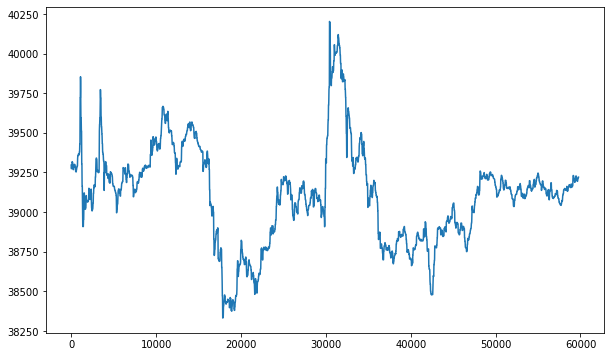

In [143]:
df_bitcoin = df[df['Crypto']=="Bitcoin"]
df_bitcoin['Price']. plot(figsize=(10,6))
plt.show()

In [144]:
returns_bitcoin = df_bitcoin['Price'].cumprod()
returns_bitcoin

0        3.929667e+04
11       1.543337e+09
22       6.061303e+13
33       2.380516e+18
44       9.349499e+22
             ...     
59719             inf
59730             inf
59741             inf
59752             inf
59763             inf
Name: Price, Length: 5434, dtype: float64

In [145]:
df_bitcoin['Return1']= df_bitcoin['Price'].pct_change()
df_bitcoin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Timestamp,Crypto,Price,Return1
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN
11,2022-03-10 12:48:00,Bitcoin,39274.000000,-0.000577
22,2022-03-10 12:48:30,Bitcoin,39274.000000,0.000000
33,2022-03-10 12:49:00,Bitcoin,39274.000000,0.000000
44,2022-03-10 12:49:30,Bitcoin,39275.090909,0.000028
...,...,...,...,...
59719,2022-03-12 10:02:00,Bitcoin,39213.000000,0.000000
59730,2022-03-12 10:02:30,Bitcoin,39214.000000,0.000026
59741,2022-03-12 10:03:00,Bitcoin,39221.000000,0.000179
59752,2022-03-12 10:03:30,Bitcoin,39221.000000,0.000000


In [149]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate




In [152]:
for crypto_i in crypto_list:

  filter_crypto_i = df['Crypto']==crypto_i
  return_series= df.loc[filter_crypto_i, 'Price'].pct_change()
  N = 160
  rf = 0.01
  df.loc[filter_crypto_i, 'Sharpe'] = sharpe_ratio(return_series, N, rf)

df

,Timestamp,Crypto,Price,Sharpe
0,2022-03-10 12:47:30,Bitcoin,39296.666667,-2.012220
1,2022-03-10 12:47:30,Ethereum,2606.680000,-2.079326
2,2022-03-10 12:47:30,Terra,95.693333,-1.425159
3,2022-03-10 12:47:30,XRP,0.737811,-1.001176
4,2022-03-10 12:47:30,Cardano,0.811748,-2.187634
...,...,...,...,...
59769,2022-03-12 10:04:00,Avalanche,72.260000,-1.732988
59770,2022-03-12 10:04:00,Polkadot,18.310000,-1.344539
59771,2022-03-12 10:04:00,Dogecoin,0.116822,-1.166371
59772,2022-03-12 10:04:00,Shiba Inu,0.000022,-2.101091


In [153]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg


In [156]:
for crypto_i in crypto_list:

  filter_crypto_i = df['Crypto']==crypto_i
  return_series= df.loc[filter_crypto_i, 'Price'].pct_change()
  N = 160
  rf = 0.01
  df.loc[filter_crypto_i, 'Sortino'] = sortino_ratio(return_series, N, rf)

df

,Timestamp,Crypto,Price,Sharpe,Sortino
0,2022-03-10 12:47:30,Bitcoin,39296.666667,-2.012220,-1.655245
1,2022-03-10 12:47:30,Ethereum,2606.680000,-2.079326,-1.779875
2,2022-03-10 12:47:30,Terra,95.693333,-1.425159,-1.417743
3,2022-03-10 12:47:30,XRP,0.737811,-1.001176,-0.931296
4,2022-03-10 12:47:30,Cardano,0.811748,-2.187634,-2.144906
...,...,...,...,...,...
59769,2022-03-12 10:04:00,Avalanche,72.260000,-1.732988,-1.719495
59770,2022-03-12 10:04:00,Polkadot,18.310000,-1.344539,-1.223715
59771,2022-03-12 10:04:00,Dogecoin,0.116822,-1.166371,-0.909346
59772,2022-03-12 10:04:00,Shiba Inu,0.000022,-2.101091,-1.860857


In [ ]:
for crypto_i in crypto_list:
  std = df.loc[filter_crypto_i, 'Price'].std()
  filter_crypto_i = df['Crypto']==crypto_i
  df_bitcoin.loc[filter_crypto_i, 'MediaMovil10'] = df.loc[filter_crypto_i, 'Price'].rolling(200, min_periods=None).mean()

df_bitcoin

In [ ]:
pct_bitcoin= df_bitcoin['Price'].pct_change()
pct_bitcoin

In [ ]:
returns_bitcoin = np.log(1 + pct_bitcoin)

returns_bitcoin

returns_bitcoin.plot(figsize=(10,6))
plt.show()


In [ ]:
def sharpe_ratio(return_series, N, rf):
    mean = returns_bitcoin.mean() * N -rf
    sigma = returns_bitcoin.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate
sharpes = df.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpes.plot.bar()

In [ ]:
def sharpe_ratio(return_series, N, rf):
    mean = returns_bitcoin.mean() * N -rf
    sigma = returns_bitcoin.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate
sharpes = df.apply(sharpe_ratio, args=(N,rf,),axis=0)
sharpes

In [ ]:
std_bitcoin = df_bitcoin['Price'].std()
std_bitcoin

In [ ]:
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'RollAverage200'] = df.loc[filter_crypto_i, 'Price'].rolling(200, min_periods=None).mean()
df

In [ ]:
# Filter to keep bitcoin
df_bitcoin = df[df['Crypto']=="Bitcoin"]
df

In [ ]:
# How to use talib: 
talib.APO(df_bitcoin['Price'], fastperiod=12, slowperiod=26, matype=0)

In [ ]:
df_bitcoin['APO'] = talib.APO(df_bitcoin['Price'], fastperiod=12, slowperiod=26, matype=0)
df_bitcoin

### 04_02_02 Example with several cryptos

In [ ]:
crypto_list = list(df['Crypto'].unique())
crypto_list

In [ ]:
# how to act on each coin
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  display(df[filter_crypto_i])

In [ ]:
# Using TA-LIB
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'APO'] = talib.APO(df.loc[filter_crypto_i, 'Price'], fastperiod=12, slowperiod=26, matype=0)

df